In [34]:
# Raw Audio Data Analysis
# Exploratory Data Analysis for Audio Classification Dataset

import os
import random
import librosa
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("coolwarm")

# Paths to raw audio folders
dataset_path = "../data/raw/dataset"
glass_brake = f"{dataset_path}/glass_break"
gunshot = f"{dataset_path}/gunshot"
scream = f"{dataset_path}/scream"
neutral = f"{dataset_path}/neutral"

class_paths = {
    'glass_break': glass_brake,
    'gunshot': gunshot,
    'scream': scream,
    'neutral': neutral
}

#### 1. Dataset Overview - File Counts

In [ ]:


def count_audio_files(folder_path):
    """Count audio files in a folder"""
    if not os.path.exists(folder_path):
        return 0, []
    
    audio_extensions = ['.wav', '.mp3', '.flac', '.m4a', '.aac', '.ogg']
    files = []
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in audio_extensions):
            files.append(file)
    return len(files), files

print("\nFile Count")
print("-" * 30)

file_counts = {}
all_files = {}

for class_name, path in class_paths.items():
    count, files = count_audio_files(path)
    file_counts[class_name] = count
    all_files[class_name] = files
    print(f"{class_name:12}: {count:4d} files")

total_files = sum(file_counts.values())
print(f"{'Total':12}: {total_files:4d} files")


File Count
------------------------------
glass_break :  337 files
gunshot     : 1794 files
scream      : 2232 files
neutral     : 2366 files
Total       : 6729 files


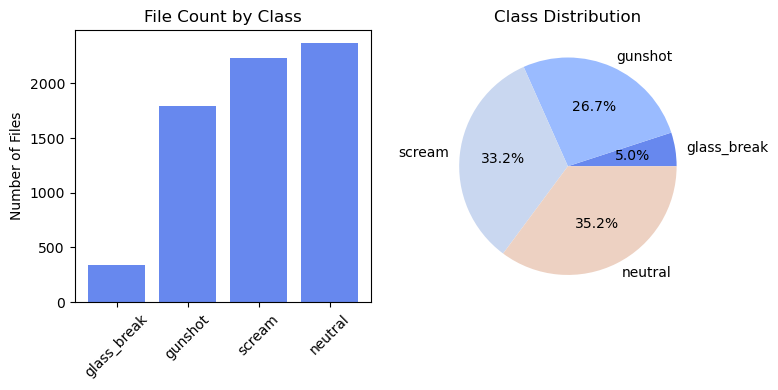

In [18]:
# Visualize file distribution
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(file_counts.keys(), file_counts.values())
plt.title('File Count by Class')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(file_counts.values(), labels=file_counts.keys(), autopct='%1.1f%%')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

#### 2. Play Audio Samples


Category: Glass Break - 337 samples
Duration of Glass_Break.Glass_Scratch.3fv6jq3u.s2.wav.3g4dunsj.ingestion-5658b4dcf-m26pc.s1.wav: 2.00 seconds


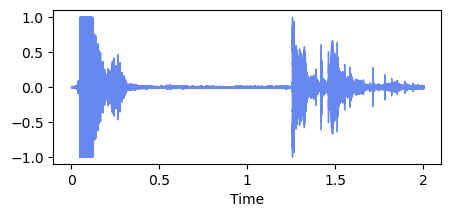


Category: Gunshot - 1794 samples
Duration of 5 (50).wav: 2.00 seconds


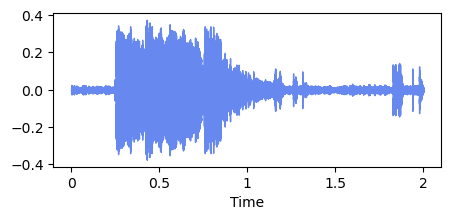


Category: Scream - 2232 samples
Duration of SDIP_15_1_0_22_0_0_0-thunderstorm-0.wav: 1.78 seconds


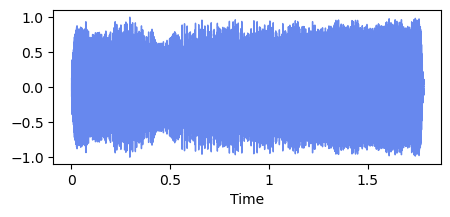


Category: Neutral - 2366 samples
Duration of 1074.wav: 2.10 seconds


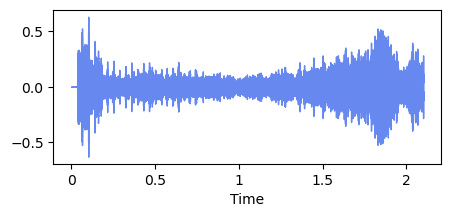

In [46]:
# Function to play an audio sample
def play_sample(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    ipd.display(ipd.Audio(audio, rate=sr))
    
# Function to visualize a random sample from each class
def visualize_sample_audio(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(5, 2))
    librosa.display.waveshow(audio, sr=sr)
    plt.show()
    
# Function to analyze the dataset
def analyze_data():
    # Get all the files in each category
    categories = {'Glass Break': glass_brake, 'Gunshot': gunshot, 'Scream': scream, 'Neutral': neutral}
    
    for category, path in categories.items():
        files = os.listdir(path)
        print(f"\nCategory: {category} - {len(files)} samples")
        
        # Randomly select a file to visualize and play
        sample_file = random.choice(files)
        sample_path = os.path.join(path, sample_file)
        
        print(f"Duration of {sample_file}: {librosa.get_duration(filename=sample_path):.2f} seconds")
        play_sample(sample_path)
        visualize_sample_audio(sample_path)

# Run analysis on raw data
analyze_data()

#### 3. Audio File Analysis

In [ ]:
def analyze_audio_file(file_path):
    """Analyze a single audio file and return metadata"""
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        duration = len(y) / sr
        
        return {
            'file_path': file_path,
            'duration': duration,
            'sample_rate': sr,
            'samples': len(y),
            'channels': 1 if y.ndim == 1 else y.shape[0],
            'file_size_mb': os.path.getsize(file_path) / (1024 * 1024)
        }
    except Exception as e:
        print(f"Error analyzing {file_path}: {e}")
        return None

In [ ]:
# Analyze all files
audio_data = []
class_stats = defaultdict(list)

# Loop over each class and process files
for class_name, files in all_files.items():
    if not files:
        continue

    print(f"\nAnalyzing {class_name} class...")
    class_path = class_paths[class_name]
    
    for i, file in enumerate(tqdm(files, desc=f"Processing {class_name}", unit="file")):
        file_path = os.path.join(class_path, file)
        metadata = analyze_audio_file(file_path)
        
        if metadata:
            metadata['class'] = class_name
            metadata['filename'] = file
            audio_data.append(metadata)


Analyzing glass_break class...


Processing glass_break: 100%|██████████| 337/337 [00:00<00:00, 609.74file/s]



Analyzing gunshot class...


Processing gunshot: 100%|██████████| 1794/1794 [00:02<00:00, 808.99file/s]



Analyzing scream class...


Processing scream: 100%|██████████| 2232/2232 [00:01<00:00, 1328.60file/s]



Analyzing neutral class...


Processing neutral: 100%|██████████| 2366/2366 [00:02<00:00, 1054.19file/s]


In [21]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(audio_data)

if len(df) == 0:
    print("No audio files found or all files failed to load!")
    print("Please check if:")
    print("1. The paths are correct")
    print("2. Audio files exist in the directories")
    print("3. Audio files are in supported formats (.wav, .mp3, .flac, etc.)")
else:
    print(f"\nSuccessfully analyzed {len(df)} audio files")


Successfully analyzed 6729 audio files


#### 4. Statistical Summary

In [ ]:
if len(df) > 0:
    # Overall statistics
    print("\nOverall Dataset Statistics:")
    print(f"Total files analyzed: {len(df)}")
    print(f"Total duration: {df['duration'].sum():.2f} seconds ({df['duration'].sum()/60:.2f} minutes)")
    print(f"Average file size: {df['file_size_mb'].mean():.2f} MB")
    
    # Duration statistics
    print(f"\nDuration Statistics:")
    print(f"Min duration: {df['duration'].min():.2f} seconds")
    print(f"Max duration: {df['duration'].max():.2f} seconds")
    print(f"Mean duration: {df['duration'].mean():.2f} seconds")
    print(f"Median duration: {df['duration'].median():.2f} seconds")
    print(f"Std deviation: {df['duration'].std():.2f} seconds")
    
    # Sample rate statistics
    print(f"\nSample Rate Statistics:")
    unique_sr = df['sample_rate'].unique()
    print(f"Unique sample rates: {sorted(unique_sr)}")
    print(f"Most common sample rate: {df['sample_rate'].mode().iloc[0]} Hz")
    sr_counts = df['sample_rate'].value_counts()
    for sr, count in sr_counts.items():
        print(f"  {sr} Hz: {count} files ({count/len(df)*100:.1f}%)")


Overall Dataset Statistics:
Total files analyzed: 6729
Total duration: 18552.72 seconds (309.21 minutes)
Average file size: 0.26 MB

Duration Statistics:
Min duration: 0.13 seconds
Max duration: 360.00 seconds
Mean duration: 2.76 seconds
Median duration: 2.00 seconds
Std deviation: 7.57 seconds

Sample Rate Statistics:
Unique sample rates: [16000, 22050, 23999, 24000, 24414, 32000, 44100, 48000, 96000]
Most common sample rate: 16000 Hz
  16000 Hz: 3415 files (50.8%)
  44100 Hz: 2235 files (33.2%)
  48000 Hz: 935 files (13.9%)
  24414 Hz: 99 files (1.5%)
  96000 Hz: 29 files (0.4%)
  24000 Hz: 13 files (0.2%)
  23999 Hz: 1 files (0.0%)
  32000 Hz: 1 files (0.0%)
  22050 Hz: 1 files (0.0%)


#### 5. Class-wise Analysis


Class-wise Analysis
            duration                            sample_rate file_size_mb
               count  mean    std   min     max    <lambda>         mean
class                                                                   
glass_break      337  3.41   2.70  0.91   21.58       44100         0.35
gunshot         1794  1.97  13.40  1.00  360.00       44100         0.29
neutral         2366  3.51   4.78  0.13   36.00       16000         0.30
scream          2232  2.49   1.44  0.50   11.83       16000         0.17


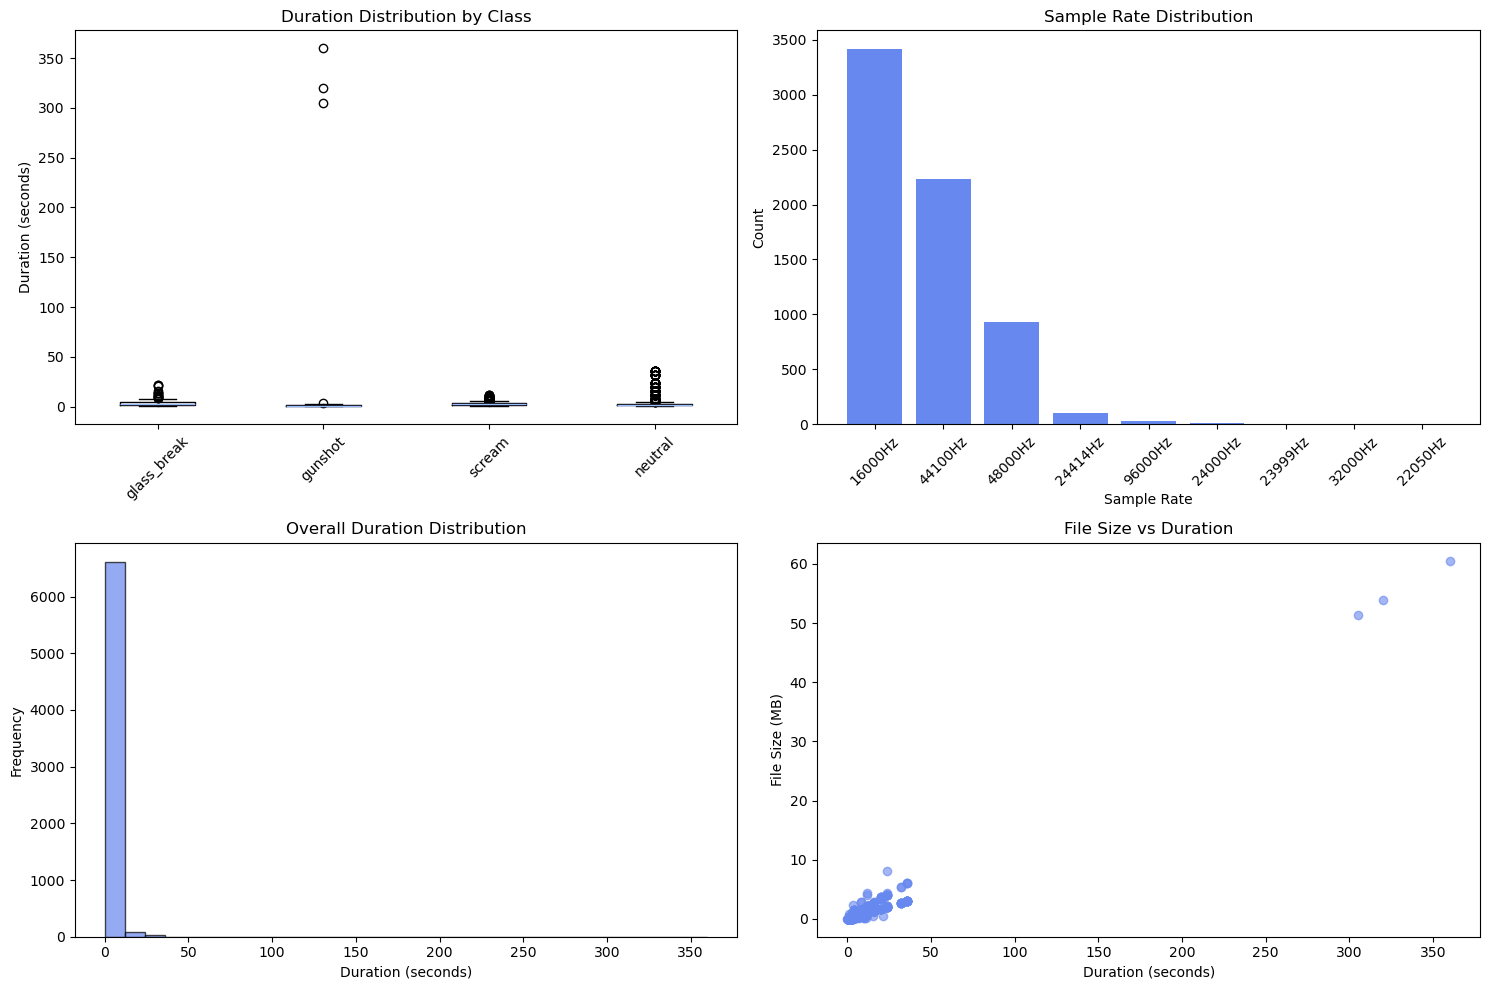

In [32]:
if len(df) > 0:
    print("\nClass-wise Analysis")
    print("=" * 73)
    
    class_summary = df.groupby('class').agg({
        'duration': ['count', 'mean', 'std', 'min', 'max'],
        'sample_rate': lambda x: x.mode().iloc[0] if len(x) > 0 else None,
        'file_size_mb': 'mean'
    }).round(2)
    
    print(class_summary)
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Duration distribution by class
    axes[0, 0].boxplot([df[df['class'] == cls]['duration'] for cls in df['class'].unique()], 
                       labels=df['class'].unique())
    axes[0, 0].set_title('Duration Distribution by Class')
    axes[0, 0].set_ylabel('Duration (seconds)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Sample rate distribution
    sample_rate_dist = df['sample_rate'].value_counts()
    axes[0, 1].bar(range(len(sample_rate_dist)), sample_rate_dist.values)
    axes[0, 1].set_title('Sample Rate Distribution')
    axes[0, 1].set_xlabel('Sample Rate')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_xticks(range(len(sample_rate_dist)))
    axes[0, 1].set_xticklabels([f'{sr}Hz' for sr in sample_rate_dist.index], rotation=45)
    
    # Duration histogram
    axes[1, 0].hist(df['duration'], bins=30, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Overall Duration Distribution')
    axes[1, 0].set_xlabel('Duration (seconds)')
    axes[1, 0].set_ylabel('Frequency')
    
    # File size distribution
    axes[1, 1].scatter(df['duration'], df['file_size_mb'], alpha=0.6)
    axes[1, 1].set_title('File Size vs Duration')
    axes[1, 1].set_xlabel('Duration (seconds)')
    axes[1, 1].set_ylabel('File Size (MB)')
    
    plt.tight_layout()
    plt.show()